In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb



expon = lambda n: stat.gamma(n, loc = 1)
my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [7]:
def length(x, y):
    return m.sqrt(x**2 + y**2)

My value is 4.928725566538832
Theoretical value is  4.934802200544679


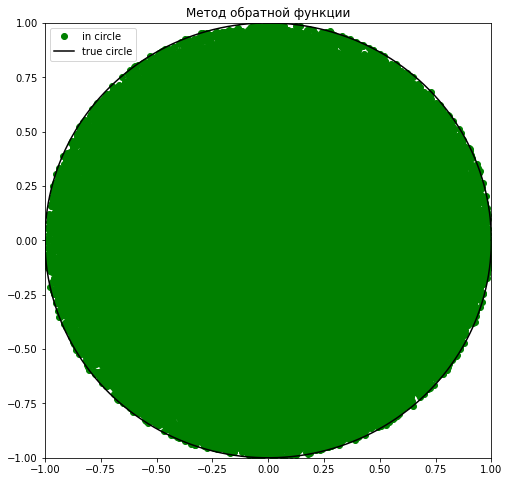

In [21]:
def new_vyborka_circle(size):
    counter = 0; sample_x = []; sample_y = []; sample_z = []; ans = 0;
    while (counter < size):
        r = (stat.uniform.rvs(0, 1)) ** (1/3) #ВНИМАНИЕ, КОРЕНЬ!
        phi = stat.uniform.rvs(0, 2 * m.pi)
        psi = stat.uniform.rvs(0, 2 * m.pi)
        counter += 1
        
        x1 = r * m.cos(phi) * m.cos(psi)
        y1 = r * m.cos(phi) * m.sin(psi)
        z1 = r * m.sin(phi)
        
        sample_x.append(r * m.cos(phi) * m.cos(psi))
        sample_y.append(r * m.cos(phi) * m.sin(psi))
        sample_z.append(r * m.sin(phi))
        
        ans += (m.sqrt(1 - x1**2 - y1**2 - z1 **2))
    return sample_x, sample_y, sample_z, ans


samplesize = 100000
sample_x, sample_y, sample_z, ans = new_vyborka_circle(samplesize)

print('My value is', ans * 4 / 3 * m.pi * 2 / samplesize)
print('Theoretical value is ', m.pi ** (2) / m.gamma(3))

x_beauty = np.linspace(-1, 1, 2000)
y_beauty = [m.sqrt(1 - element**2) for element in x_beauty]

plt.figure(figsize=(8, 8))
plt.plot(sample_x, sample_y, 'o', color = 'green', label = 'in circle')
plt.plot(x_beauty, y_beauty, color = 'k', label = 'true circle')
plt.plot(x_beauty, [-elem for elem in y_beauty], color = 'k')
plt.xscale("linear")
plt.yscale("linear")
plt.axis([-1, 1, -1, 1])
plt.legend(loc = 'upper left')
plt.title("Метод обратной функции")
plt.show()

In [20]:
def volume_globe(size, n): #size of the sample
    counter = 0; ans = 0; i = 0;
    while (i < size):
        r = (stat.uniform.rvs(-1, 2, size = n))
        
        length_r = 0
        for elem in r:
            length_r += elem * elem;
        
        if length_r < 1:
            counter += 1 
         
        i += 1
    return 2 ** n * counter / size


samplesize = 100000

for n in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]:
    print("n = ", n)
    print('My value is', volume_globe(samplesize, n))
    print('Theoretical value is ', m.pi ** (n / 2) / m.gamma(n / 2 + 1))

n =  2
My value is 3.14104
Theoretical value is  3.141592653589793
n =  3
My value is 4.19008
Theoretical value is  4.1887902047863905
n =  4
My value is 4.94784
Theoretical value is  4.934802200544679
n =  5
My value is 5.2144
Theoretical value is  5.263789013914325
n =  6
My value is 5.23584
Theoretical value is  5.167712780049969
n =  7
My value is 4.53504
Theoretical value is  4.7247659703314016
n =  8
My value is 4.03456
Theoretical value is  4.058712126416768
n =  9
My value is 3.30752
Theoretical value is  3.2985089027387064
n =  10
My value is 2.4576
Theoretical value is  2.550164039877345
n =  20
My value is 0.0
Theoretical value is  0.02580689139001405
n =  30
My value is 0.0
Theoretical value is  2.1915353447830204e-05


In [19]:
samplesize = 1000000
print('BIG sample time!')
for n in [20, 30]:
    print("n = ", n)
    print('My value is', volume_globe(samplesize, n))
    print('Theoretical value is ', m.pi ** (n / 2) / m.gamma(n / 2 + 1))

print('Получился нуль')

BIG sample time!
n =  20
My value is 0.0
Theoretical value is  0.02580689139001405
n =  30


KeyboardInterrupt: 